## Exploratory Data Analysis

In [10]:
import os, json, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import dask
import dask.dataframe as dd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None 

In [2]:
# load the data
path = ''
df = dd.read_csv(path+'data.csv')

# drop rows with missing values
df=df.replace(-9999.0,np.nan).dropna(how = 'any')

In [3]:
# undersample
df = df.loc[::10]
print(len(df))
print(len(df[df['class'] == 'GALAXY']))
print(len(df[df['class'] == 'STAR']))
print(len(df[df['class'] == 'QSO']))

351089
209266
81536
60287


In [4]:
df.columns.values

array(['objid', 'ra', 'dec', 'Redshift', 'fiberMag_u', 'petroMag_u',
       'modelMag_u', 'psfMag_u', 'fiberMag_g', 'petroMag_g', 'modelMag_g',
       'psfMag_g', 'fiberMag_r', 'petroMag_r', 'modelMag_r', 'psfMag_r',
       'fiberMag_i', 'petroMag_i', 'modelMag_i', 'psfMag_i', 'fiberMag_z',
       'petroMag_z', 'modelMag_z', 'psfMag_z', 'class'], dtype=object)

In [5]:
# some rudimentary feature engineering
# create a feature that is sensitive to the spatial size of a source:
df['modelMag_r-fiberMag_r'] = df['modelMag_r']-df['fiberMag_r']

# create colours:
bands = ['u','g','r','i','z']
for i,b1 in enumerate(bands[:-1]):
    for b2 in bands[i+1:]:
        df['modelMag_'+b1+'-modelMag_'+b2] = df['modelMag_'+b1] - df['modelMag_'+b2]

print(df.columns.values)

['objid' 'ra' 'dec' 'Redshift' 'fiberMag_u' 'petroMag_u' 'modelMag_u'
 'psfMag_u' 'fiberMag_g' 'petroMag_g' 'modelMag_g' 'psfMag_g' 'fiberMag_r'
 'petroMag_r' 'modelMag_r' 'psfMag_r' 'fiberMag_i' 'petroMag_i'
 'modelMag_i' 'psfMag_i' 'fiberMag_z' 'petroMag_z' 'modelMag_z' 'psfMag_z'
 'class' 'modelMag_r-fiberMag_r' 'modelMag_u-modelMag_g'
 'modelMag_u-modelMag_r' 'modelMag_u-modelMag_i' 'modelMag_u-modelMag_z'
 'modelMag_g-modelMag_r' 'modelMag_g-modelMag_i' 'modelMag_g-modelMag_z'
 'modelMag_r-modelMag_i' 'modelMag_r-modelMag_z' 'modelMag_i-modelMag_z']


In [6]:
cols_ml = [x for x in df.columns.values.tolist() if 'Mag_' in x]
df = df.compute()
df['class']

0         GALAXY
10        GALAXY
20        GALAXY
30           QSO
40           QSO
           ...  
161460    GALAXY
161470       QSO
161480       QSO
161490      STAR
161500    GALAXY
Name: class, Length: 351089, dtype: object

In [7]:
df=df.sort_values(by=['ra'])
df

,objid,ra,dec,Redshift,fiberMag_u,petroMag_u,modelMag_u,psfMag_u,fiberMag_g,petroMag_g,...,modelMag_u-modelMag_g,modelMag_u-modelMag_r,modelMag_u-modelMag_i,modelMag_u-modelMag_z,modelMag_g-modelMag_r,modelMag_g-modelMag_i,modelMag_g-modelMag_z,modelMag_r-modelMag_i,modelMag_r-modelMag_z,modelMag_i-modelMag_z
106310,1237679504318922907,0.001661,20.397911,0.169639,23.19317,24.06787,23.09053,22.82628,22.08305,22.35545,...,0.93142,1.18984,1.11208,1.57977,0.25842,0.18066,0.64835,-0.07776,0.38993,0.46769
85930,1237679477470265897,0.001699,22.313928,-0.000842,22.40629,21.80065,21.93820,21.91749,21.26552,21.00201,...,1.03176,1.42015,1.58159,1.58350,0.38839,0.54983,0.55174,0.16144,0.16335,0.00191
88680,1237679478007202593,0.003054,22.654332,0.687130,23.72759,20.56767,22.96340,23.26116,23.81548,22.47039,...,0.25837,2.29204,3.48837,4.19817,2.03367,3.23000,3.93980,1.19633,1.90613,0.70980
122220,1237656495113633949,0.004698,14.666738,0.494372,24.64123,27.72672,24.16196,24.22452,22.79229,21.48647,...,2.14622,3.96156,4.89292,5.30700,1.81534,2.74670,3.16078,0.93136,1.34544,0.41408
178342,1237657191978959047,0.004742,0.708960,0.652078,22.79361,22.60482,20.88348,22.85150,22.60140,20.66000,...,0.56076,1.28619,2.00339,1.88960,0.72543,1.44263,1.32884,0.71720,0.60341,-0.11379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206160,1237680297281127272,359.996771,21.785129,0.403197,25.55326,23.06392,26.63804,26.12176,22.29978,21.04331,...,5.63014,7.61149,8.32248,8.74460,1.98135,2.69234,3.11446,0.71099,1.13311,0.42212
245641,1237663306917741344,359.997392,29.784564,2.181215,22.86479,22.65849,22.53520,22.41355,21.84419,21.55383,...,1.11071,1.41677,1.49492,2.14227,0.30606,0.38421,1.03156,0.07815,0.72550,0.64735
86230,1237663784197357819,359.997663,0.144871,1.355421,20.82982,20.60065,20.50475,20.45739,20.79091,20.53729,...,-0.01320,0.21841,0.22166,0.16939,0.23161,0.23486,0.18259,0.00325,-0.04902,-0.05227
238840,1237669768154054658,359.997837,8.470280,2.683349,18.47355,18.20370,18.16550,18.17316,18.54374,18.27373,...,-0.06948,-0.36008,-0.60637,-0.78399,-0.29060,-0.53689,-0.71451,-0.24629,-0.42391,-0.17762


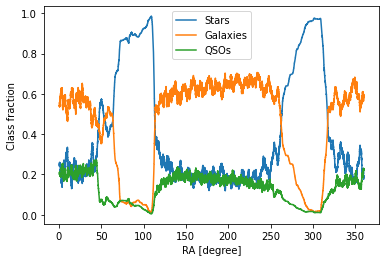

In [8]:
df['isStar'] = np.where(df['class']=='STAR',1,0)
df['frac_star'] = df['isStar'].rolling(1000).mean()

df['isQSO'] = np.where(df['class']=='QSO',1,0)
df['frac_qso'] = df['isQSO'].rolling(1000).mean()

df['isGalaxy'] = np.where(df['class']=='GALAXY',1,0)
df['frac_galaxy'] = df['isGalaxy'].rolling(1000).mean()

plt.plot(df.ra,df.frac_star,label='Stars')
plt.plot(df.ra,df.frac_galaxy,label='Galaxies')
plt.plot(df.ra,df.frac_qso,label='QSOs')
plt.xlabel('RA [degree]')
plt.ylabel('Class fraction')
plt.legend()
plt.show()
#plt.savefig(path+'class_fraction.pdf')
#plt.close()

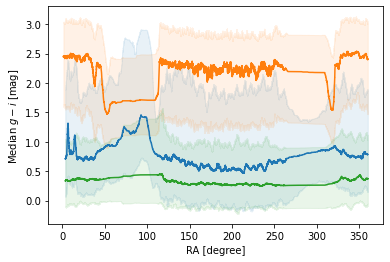

In [9]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

df['g-i_rolling'] = df['modelMag_g-modelMag_i'].rolling(1000).median()

df_stars = df[df.isStar==1]
df_stars['g-i_rolling'] = df_stars['modelMag_g-modelMag_i'].rolling(1000).median()
df_stars['g-i_rolling_mean'] = df_stars['modelMag_g-modelMag_i'].rolling(1000).mean()
df_stars['g-i_rolling_plus_1sigma'] = df_stars['g-i_rolling_mean']+df_stars['modelMag_g-modelMag_i'].rolling(1000).std()
df_stars['g-i_rolling_minus_1sigma'] = df_stars['g-i_rolling_mean']-df_stars['modelMag_g-modelMag_i'].rolling(1000).std()


df_gal = df[df.isGalaxy==1]
df_gal['g-i_rolling'] = df_gal['modelMag_g-modelMag_i'].rolling(1000).median()
df_gal['g-i_rolling_mean'] = df_gal['modelMag_g-modelMag_i'].rolling(1000).mean()
df_gal['g-i_rolling_plus_1sigma'] = df_gal['g-i_rolling_mean']+df_gal['modelMag_g-modelMag_i'].rolling(1000).std()
df_gal['g-i_rolling_minus_1sigma'] = df_gal['g-i_rolling_mean']-df_gal['modelMag_g-modelMag_i'].rolling(1000).std()


df_qso = df[df.isQSO==1]
df_qso['g-i_rolling'] = df_qso['modelMag_g-modelMag_i'].rolling(1000).median()
df_qso['g-i_rolling_mean'] = df_qso['modelMag_g-modelMag_i'].rolling(1000).mean()
df_qso['g-i_rolling_plus_1sigma'] = df_qso['g-i_rolling_mean']+df_qso['modelMag_g-modelMag_i'].rolling(1000).std()
df_qso['g-i_rolling_minus_1sigma'] = df_qso['g-i_rolling_mean']-df_qso['modelMag_g-modelMag_i'].rolling(1000).std()


plt.plot(df_stars.ra,df_stars['g-i_rolling'],label='Stars')
plt.fill_between(df_stars.ra,
                 df_stars['g-i_rolling_plus_1sigma'],
                df_stars['g-i_rolling_minus_1sigma'],color=cycle[0],alpha=0.1)

plt.plot(df_gal.ra,df_gal['g-i_rolling'],label='Galaxies')
plt.fill_between(df_gal.ra,
                 df_gal['g-i_rolling_plus_1sigma'],
                df_gal['g-i_rolling_minus_1sigma'],color=cycle[1],alpha=0.1)

plt.plot(df_qso.ra,df_qso['g-i_rolling'],label='QSOs')
plt.fill_between(df_qso.ra,
                 df_qso['g-i_rolling_plus_1sigma'],
                df_qso['g-i_rolling_minus_1sigma'],color=cycle[2],alpha=0.1)


plt.xlabel('RA [degree]')
plt.ylabel('Median $g-i$ [mag]')

plt.show()

#plt.savefig(path2+'median_colours.pdf')
#plt.close()